In [1]:
# импорт библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# загрузим 1 датасет
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
nr, nc = data.shape
print (f"Здесь {nr} строки и {nc} колонки")

Здесь 768 строки и 9 колонки


In [4]:
data.size
print (f"В этом датасете {data.size} наблюдений")

В этом датасете 6912 наблюдений


In [5]:
# названия колонок
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# общая информация по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


пропущенных значений в колонках нет

In [7]:
# посмотрим основные статистики в датасете
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# проверим на дубликаты
data.duplicated().sum()

0

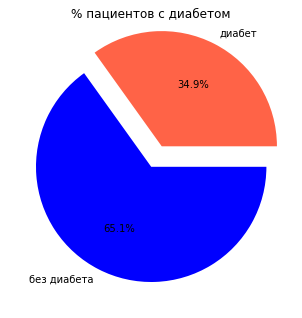

In [26]:
#посмотрим какое количство пациентов с диабетом в датасете
outcome_0 = data[data['Outcome'] == 0].shape[0]
outcome_1 = data.shape[0] - outcome_0

outcome_pic = plt.figure(figsize=(4,5))
axes = outcome_pic.add_axes([0, 0, 1, 1])
axes.pie(
    x=[outcome_0, outcome_1],
    labels=["без диабета","диабет"],
    colors=['blue','tomato'],
    autopct='%.1f%%',
    explode=[0, 0.2],
    shadow=False,
    counterclock=False
)
axes.set_title('% пациентов с диабетом');

##### Комментарий: 
Почти 2/3 пациентов без диабета в данном датасете, что необходимо будет учитывать при построении модели машинного обучения и уравновешивать классы

In [15]:
# разделим признаки для построения корреляции признаков
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']

<AxesSubplot:title={'center':'Корреляция с развитием диабета'}>

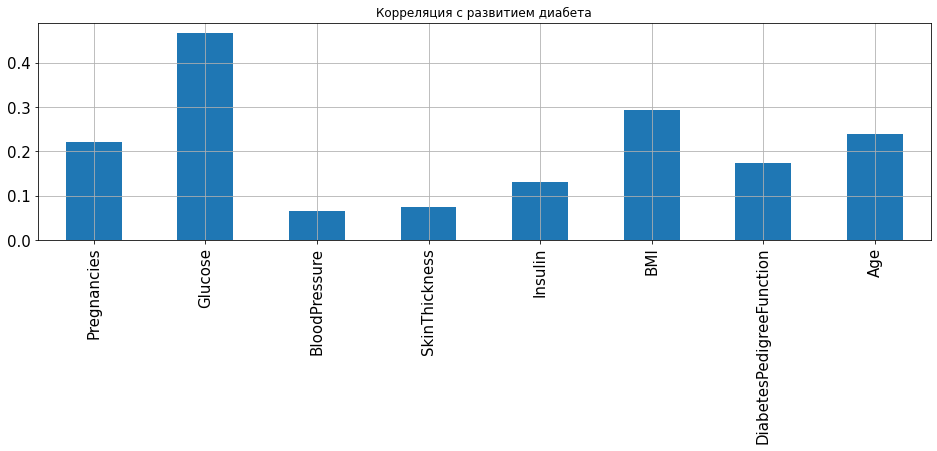

In [16]:
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Корреляция с развитием диабета", fontsize = 15,
        rot = 90, grid = True)

C:\Users\BEU_RU1\AppData\Local\Temp/ipykernel_7436/533178641.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

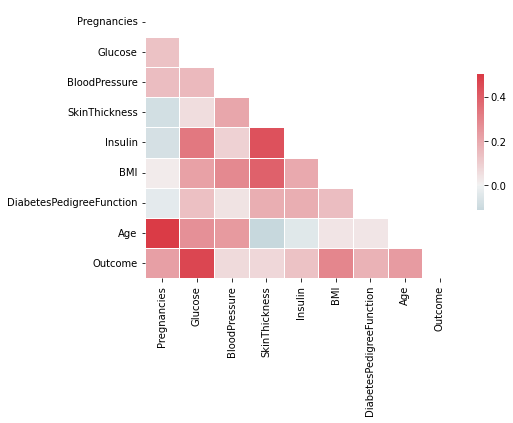

In [17]:
# построим также тепловую корреляционную матрицу признаков для более наглядной визуальной формы
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

##### Комментарий: 
Очевидна наиболее высокая корреляция развития сахарного диабета и уровня глюкозы в крови при тесте толерантности, а также возраста и индекса массы тела

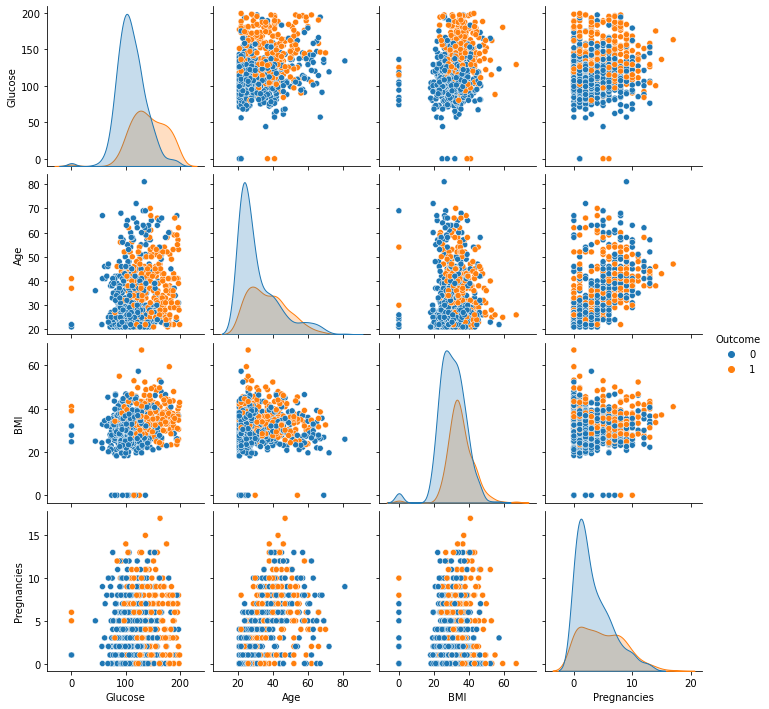

In [18]:
sns.pairplot(data = data, vars = ['Glucose', 'Age', 'BMI', 'Pregnancies'], hue = 'Outcome')
plt.show()

##### Комментарий: 
При этом между собой визуально определяется относительная корреляция индекса массы тела и уровня глюкозы

AttributeError: 'FacetGrid' object has no attribute 'set_title'

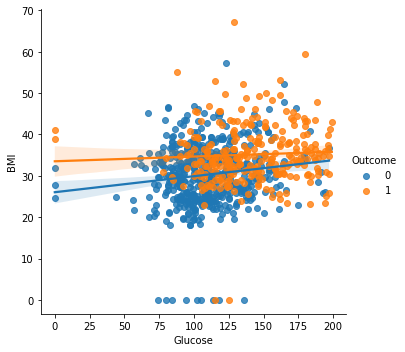

In [93]:
# посмотрим как распределеются по индексу массы тела и глюкозы пациенты с диабетом и без
bmi_plot = sns.lmplot(x='Glucose', y='BMI', data=data, hue='Outcome')


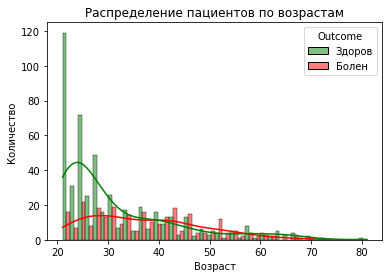

In [36]:
# посмотрим как распределеются по возрасту пациенты с диабетом и без
new_data = data.copy()
new_data.Outcome = new_data.Outcome.apply(lambda x: 'Болен' if x == 1. else 'Здоров')

age_histogram = sns.histplot(
    data=new_data,
    x='Age',
    hue='Outcome',
    hue_order=['Здоров', 'Болен'],
    multiple='dodge',
    bins=40,
    kde=True,
    palette={'Здоров': 'green', 'Болен': 'red'})

age_histogram.set_title('Распределение пациентов по возрастам')
age_histogram.set_xlabel('Возраст')
age_histogram.set_ylabel('Количество');

##### Комментарий: 
пациенты без диабета более молодые, для пациентов с диабетом характерно более равномерно распределение среди возрастов в группе от 20 до 45

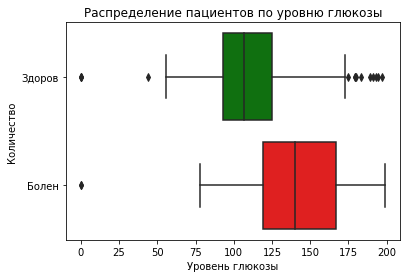

In [21]:
# посмотрим как распределеются по уровню глюкозы пациенты с диабетом и без
new_data = data.copy()
new_data.Outcome = new_data.Outcome.apply(lambda x: 'Болен' if x == 1. else 'Здоров')

glu_box = sns.boxplot(
    data=new_data,
    x='Glucose',
    y='Outcome',
    order=['Здоров', 'Болен'],
    orient='h',
    palette={'Здоров': 'green', 'Болен': 'red'})

glu_box.set_title('Распределение пациентов по уровню глюкозы')
glu_box.set_xlabel('Уровень глюкозы')
glu_box.set_ylabel('Количество');

Очевидно, что у пациентов с сахарным диабетом значительно выше медианный уровень глюкозы

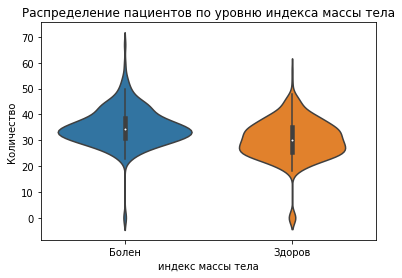

In [22]:
# посмотрим как распределеются по индексу массы тела пациенты с диабетом и без
bmi_plot = sns.violinplot(x='Outcome', y='BMI', data=new_data)

bmi_plot.set_title('Распределение пациентов по уровню индекса массы тела')
bmi_plot.set_xlabel('индекс массы тела')
bmi_plot.set_ylabel('Количество');

##### Комментарий:
Очевидно, что у пациентов с сахарным диабетом значительно выше медианный уровень индекса массы тела и дисперсия несколько меньше, чем у пациентов без диабета

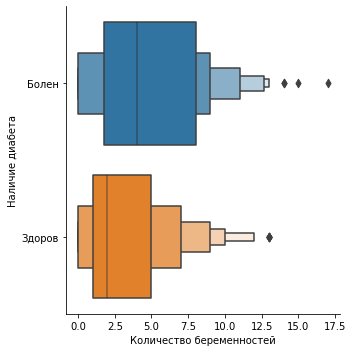

In [23]:
preg_plot = sns.catplot(x='Pregnancies', y='Outcome', data=new_data, kind='boxen')

preg_plot.set_axis_labels('Количество беременностей', 'Наличие диабета')
preg_plot.set_titles('Распределение пациентов c диабетом по количеству бееременностей')

##### Комментарий:
Очевидно, что у пациентов с сахарным диабетом количество беременностей выше, чем у пациентов без диабета

### Таким образом, на основании данного датасета можно сделать вывод, что у пациентов с сахарным диабетом более высокий уровень глюкозы, индекс массы тела, большее количество бееременностей в анамнезе, прим это распределение по возрасту примерно одинамокове в подгруппе от 20 до 45

In [10]:
# загрузим 2 датасет
cardio = pd.read_csv('data/train.csv')
cardio.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [42]:
cardio.rename(columns = {'diabetes' : 'Outcome', 'age' : 'Age', 'glucose' : 'Glucose'}, inplace = True)

In [43]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   Age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   Outcome          3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  Glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [41]:
data_1 = data[['Glucose', 'Age', 'BMI', 'Outcome', 'BloodPressure']]
data_1.rename(columns = {'BloodPressure' : 'diaBP'}, inplace = True)
data_1.head()

C:\Users\BEU_RU1\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Glucose,Age,BMI,Outcome,diaBP
0,148,50,33.6,1,72
1,85,31,26.6,0,66
2,183,32,23.3,1,64
3,89,21,28.1,0,66
4,137,33,43.1,1,40


In [44]:
data_1 = data_1.astype({'Glucose':'float64','diaBP':'float64'},errors='ignore')

In [45]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    float64
 1   Age      768 non-null    int64  
 2   BMI      768 non-null    float64
 3   Outcome  768 non-null    int64  
 4   diaBP    768 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 30.1 KB


In [46]:
data_2 = cardio[['Glucose', 'Age', 'BMI', 'Outcome', 'diaBP']]
data_2.head()

,Glucose,Age,BMI,Outcome,diaBP
0,80.0,64,NaN,0,85.0
1,75.0,36,29.77,0,98.0
2,94.0,46,20.35,0,71.0
3,94.0,50,28.26,0,88.0
4,77.0,64,26.42,0,85.0


In [47]:
cardio_dia = pd.concat(
    [data_1, data_2],
    ignore_index=True
)
display(cardio_dia)

,Glucose,Age,BMI,Outcome,diaBP
0,148.0,50,33.60,1,72.0
1,85.0,31,26.60,0,66.0
2,183.0,32,23.30,1,64.0
3,89.0,21,28.10,0,66.0
4,137.0,33,43.10,1,40.0
...,...,...,...,...,...
4153,103.0,60,29.28,0,79.0
4154,84.0,46,21.96,0,56.0
4155,72.0,44,28.92,0,119.0
4156,85.0,60,23.01,0,105.0


In [49]:
# общая информация по 2 датасету
cardio_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  3854 non-null   float64
 1   Age      4158 non-null   int64  
 2   BMI      4144 non-null   float64
 3   Outcome  4158 non-null   int64  
 4   diaBP    4158 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 162.5 KB


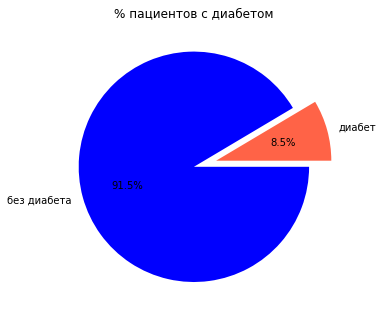

In [50]:
#посмотрим какое количество пациентов с диабетом в новом датасете
outcome_0 = cardio_dia[cardio_dia['Outcome'] == 0].shape[0]
outcome_1 = cardio_dia.shape[0] - outcome_0

outcome_pic = plt.figure(figsize=(4,5))
axes = outcome_pic.add_axes([0, 0, 1, 1])
axes.pie(
    x=[outcome_0, outcome_1],
    labels=["без диабета","диабет"],
    colors=['blue','tomato'],
    autopct='%.1f%%',
    explode=[0, 0.2],
    shadow=False,
    counterclock=False
)
axes.set_title('% пациентов с диабетом');

##### Комментарий: 
Подавляющее большинство пациентов без диабета в данном датасете так как мы с конкатенировали с датасетом пациентов с кардиозаболеваниями

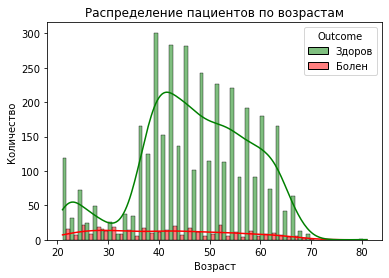

In [53]:
# посмотрим как распределеются по возрасту пациенты с диабетом и без в новом датасете
new_data = cardio_dia.copy()
new_data.Outcome = new_data.Outcome.apply(lambda x: 'Болен' if x == 1. else 'Здоров')

age_histogram = sns.histplot(
    data=new_data,
    x='Age',
    hue='Outcome',
    hue_order=['Здоров', 'Болен'],
    multiple='dodge',
    bins=40,
    kde=True,
    palette={'Здоров': 'green', 'Болен': 'red'})

age_histogram.set_title('Распределение пациентов по возрастам')
age_histogram.set_xlabel('Возраст')
age_histogram.set_ylabel('Количество');

##### Комментарии:
В датасете стало больше здоровых пациентов в возрасте от 40 до 70 лет, пациенты с диабетом по возрасту распределены равномерно

In [59]:
# разделим признаки для построения корреляции признаков
X = cardio_dia.drop(['Outcome'],axis=1)
y = cardio_dia['Outcome']

<AxesSubplot:title={'center':'Корреляция с развитием диабета'}>

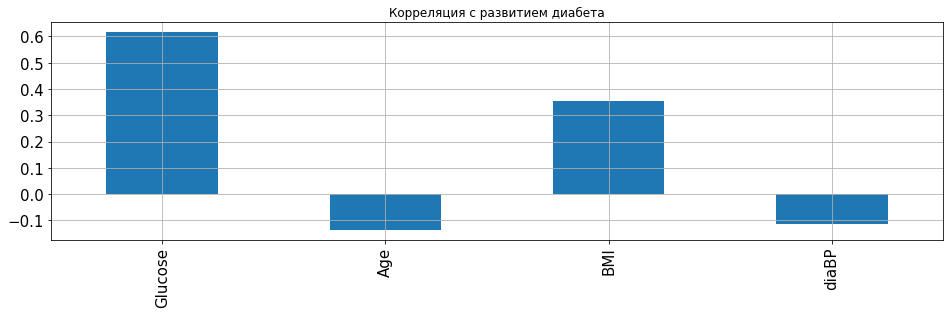

In [60]:
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Корреляция с развитием диабета", fontsize = 15,
        rot = 90, grid = True)

##### Комментарии:
В новом датасете уже более заметна корреляция только глюкозы и индкса массы тела, при этом влияние возраста значительно снизилось

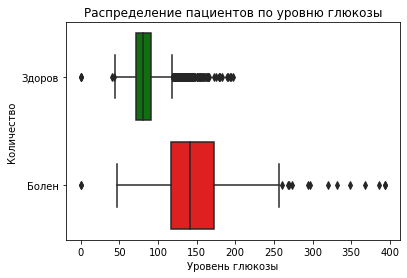

In [51]:
# посмотрим как распределеются по уровню глюкозы пациенты с диабетом и без в новом датасете
new_data = cardio_dia.copy()
new_data.Outcome = new_data.Outcome.apply(lambda x: 'Болен' if x == 1. else 'Здоров')

glu_box = sns.boxplot(
    data=new_data,
    x='Glucose',
    y='Outcome',
    order=['Здоров', 'Болен'],
    orient='h',
    palette={'Здоров': 'green', 'Болен': 'red'})

glu_box.set_title('Распределение пациентов по уровню глюкозы')
glu_box.set_xlabel('Уровень глюкозы')
glu_box.set_ylabel('Количество');

В данном датасете у пациентов без диабета значительно ниже медианный уровень глюкозы - около 75, а в предыдущем было около 100

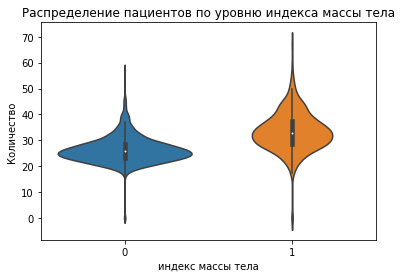

In [57]:
# посмотрим как распределеются по индексу массы тела пациенты с диабетом и без в новом датасете
bmi_plot = sns.violinplot(x='Outcome', y='BMI', data=cardio_dia)

bmi_plot.set_title('Распределение пациентов по уровню индекса массы тела')
bmi_plot.set_xlabel('индекс массы тела')
bmi_plot.set_ylabel('Количество');

##### Комментарий:
В этом датасете также очевидно, что у пациентов с сахарным диабетом значительно выше медианный уровень индекса массы тела и дисперсия несколько меньше, чем у пациентов без диабета

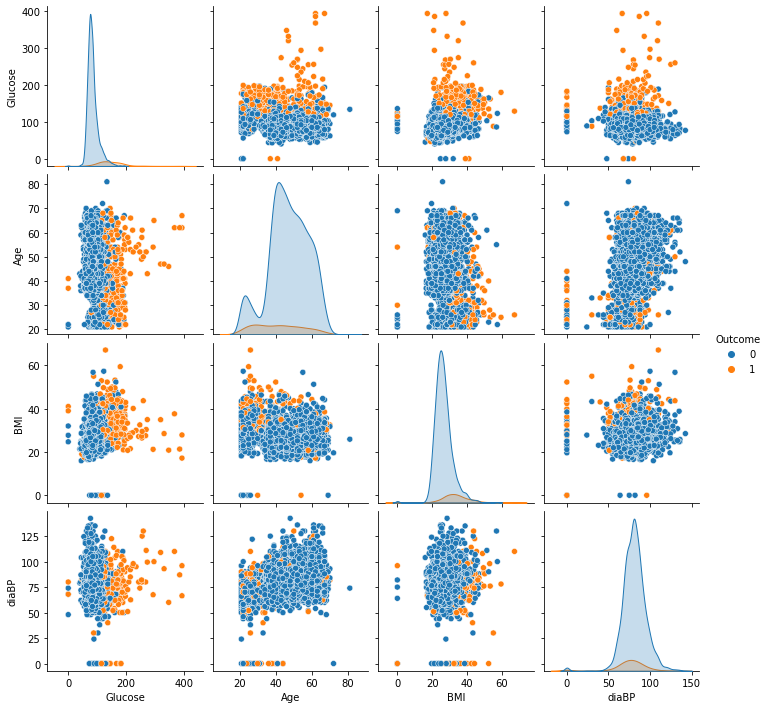

In [55]:
sns.pairplot(data = cardio_dia, vars = ['Glucose', 'Age', 'BMI', 'diaBP'], hue = 'Outcome')
plt.show()

##### Комментарии:
В новом датасете также заметна относительная корреляция индекса массы тела и глюкозы и у пациентов с диабетом их показатели выше, а также заметна корреляция возраста и уровня диастолического давления независимо от развития диабета

#### Заключения по 2 датасетам:
 Таким образом, добавив новый датасет мы увидели более четкую корреляцию уровня глюкозы в крови и индекса масса тела на развитие диабета, эти 2 показателя также коррелируют между собой

In [67]:
# загрузим 1 датасет
data_3 = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')
data_3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [80]:
new_data = cardio_dia[['Outcome', 'BMI', 'diaBP']].copy()
new_data.diaBP = new_data.diaBP.apply(lambda x: 1.0 if x >= 90. else 0)

In [78]:
new_data.head()

,Glucose,Outcome,BMI,diaBP
0,148.0,1,33.6,0.0
1,85.0,0,26.6,0.0
2,183.0,1,23.3,0.0
3,89.0,0,28.1,0.0
4,137.0,1,43.1,0.0


In [83]:
data_4 = data_3.rename(columns = {'Diabetes_binary' : 'Outcome', 'HighBP' : 'diaBP'})

In [84]:
data_prefinal = data_4[['Outcome', 'BMI', 'diaBP']].copy()
data_prefinal.head()

,Outcome,BMI,diaBP
0,0.0,40.0,1.0
1,0.0,25.0,0.0
2,0.0,28.0,1.0
3,0.0,27.0,1.0
4,0.0,24.0,1.0


In [85]:
final_data = pd.concat(
    [new_data, data_prefinal],
    ignore_index=True
)
display(final_data)

,Outcome,BMI,diaBP
0,1.0,33.6,0.0
1,0.0,26.6,0.0
2,1.0,23.3,0.0
3,0.0,28.1,0.0
4,1.0,43.1,0.0
...,...,...,...
257833,0.0,45.0,1.0
257834,1.0,18.0,1.0
257835,0.0,28.0,0.0
257836,0.0,23.0,1.0


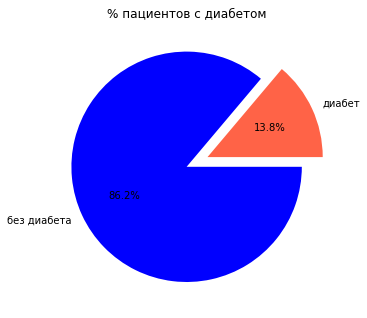

In [86]:
#посмотрим какое количество пациентов с диабетом в новом датасете
outcome_0 = final_data[final_data['Outcome'] == 0].shape[0]
outcome_1 = final_data.shape[0] - outcome_0

outcome_pic = plt.figure(figsize=(4,5))
axes = outcome_pic.add_axes([0, 0, 1, 1])
axes.pie(
    x=[outcome_0, outcome_1],
    labels=["без диабета","диабет"],
    colors=['blue','tomato'],
    autopct='%.1f%%',
    explode=[0, 0.2],
    shadow=False,
    counterclock=False
)
axes.set_title('% пациентов с диабетом');

##### Комментарий: 
Подавляющее большинство пациентов без диабета в данном датасете так как мы с конкатенировали с датасетом пациентов с кардиозаболеваниями

In [87]:
# разделим признаки для построения корреляции признаков
X = final_data.drop(['Outcome'],axis=1)
y = final_data['Outcome']

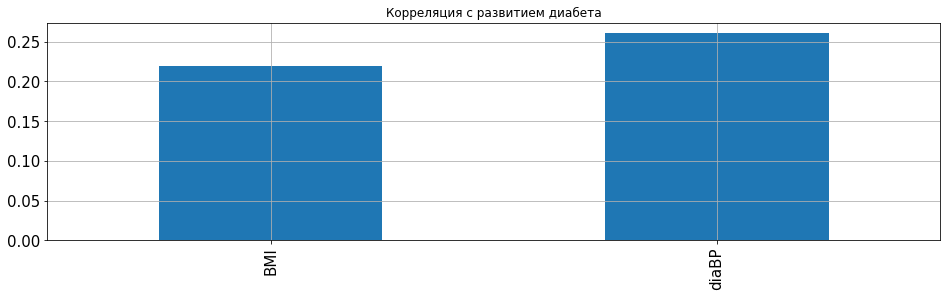

In [88]:
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Корреляция с развитием диабета", fontsize = 15,
        rot = 90, grid = True);

##### Комментарии:
В новом датасете уже более заметна корреляция высокого артериального давления с развитием диабета

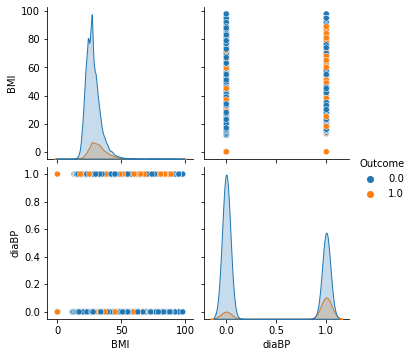

In [90]:
sns.pairplot(data = final_data, vars = ['BMI', 'diaBP'], hue = 'Outcome')
plt.show()

#### Комменатрии по 3 датасетам:

Можно сделать вывод о корреляции развития сахараного диабета от уровня глюкозы, индекса массы тела, уровня артериального давления и количества беременностей в анамнезе